8.1 求下列微分方程的符号解：<p>
$$
(1)y'-2y^2=1,y(0)=0;\\
(2)y'''-2y''+y=0,y(0)=y'(0)=1,y''(0)=0.
$$

In [2]:
import sympy as sp
t = sp.symbols('t')
y = sp.Function('y')(t)

eq = sp.Eq(sp.diff(y, t) - 2*y**2, 1)
ics = {y.subs(t, 0): 0}
sol = sp.dsolve(eq, y, ics=ics)

print(sp.simplify(sol))

Eq(y(t), sqrt(2)*tan(sqrt(2)*t)/2)


In [1]:
import sympy as sp
t = sp.symbols('t')
y = sp.Function('y')(t)
eq = sp.Eq(sp.diff(y, t, t, t) - 2*sp.diff(y, t, t) + y, 0)
ics = {y.subs(t, 0): 1, sp.diff(y, t).subs(t, 0): 1, sp.diff(y, t, t).subs(t, 0): 0}
sol = sp.dsolve(eq, y, ics=ics)
print(sp.simplify(sol))

Eq(y(t), 2*exp(t) + (-5 + sqrt(5))*exp(t*(1 - sqrt(5))/2)/10 - (sqrt(5) + 5)*exp(t*(1 + sqrt(5))/2)/10)


8.2求下列微分方程的符号解，并分别画出 x(t)和 y(t)(t &isin;[0,1] )的解曲线。
$$
\left\{
    \begin{array}{ll}
       \frac{dx}{dt}=x-2y \\
       \frac{dy}{dt}=x+2y  \\
       x(0)=1,y(0)=1. \\
    \end{array}
\right.
$$

[Eq(x(t), -5*sqrt(7)*exp(3*t/2)*sin(sqrt(7)*t/2)/7 + exp(3*t/2)*cos(sqrt(7)*t/2)), Eq(y(t), 3*sqrt(7)*exp(3*t/2)*sin(sqrt(7)*t/2)/7 + exp(3*t/2)*cos(sqrt(7)*t/2))]


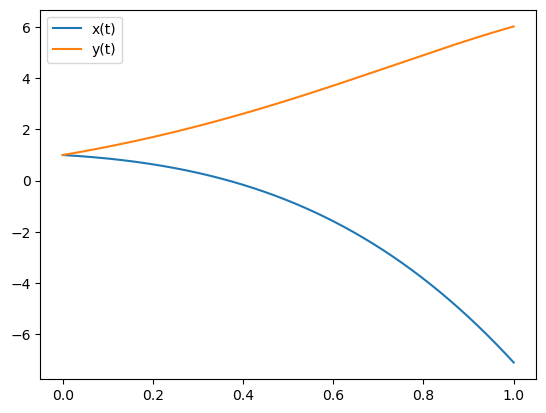

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
t = sp.symbols('t')
x = sp.Function('x')(t)
y = sp.Function('y')(t)

eq1 = sp.Eq(sp.diff(x, t), x - 2*y)
eq2 = sp.Eq(sp.diff(y, t), x + 2*y)
con = {x.subs(t, 0): 1, y.subs(t, 0): 1}
sol = sp.dsolve([eq1, eq2], [x, y], ics=con)
print(sol)

x_func = sp.lambdify(t, sol[0].rhs, 'numpy')
y_func = sp.lambdify(t, sol[1].rhs, 'numpy')
t_vals = np.linspace(0, 1, 1000)
x_vals = x_func(t_vals)
y_vals = y_func(t_vals)

plt.plot(t_vals, x_vals, label='x(t)')
plt.plot(t_vals, y_vals, label='y(t)')
plt.legend()
plt.show()

8.3 求微分方程(竖直加热板的自然对流)的数值解
$$
\left\{
    \begin{array}{ll}
       \frac{d^3f}{d\eta^3}+3f\frac{d^2f}{d\eta^2}-2(\frac{df}{d\eta})^2+T=0\\
       \frac{d^2T}{d\eta^2}+2.1f\frac{dT}{d\eta}\\
       x(0)=1,y(0)=1. \\
    \end{array}
\right.
$$
已知当$\eta=0$时，$f=0$,$\frac{df}{d\eta}=0$,$\frac{d^2f}{d\eta^2}=0.68$,$T=1,\frac{dT}{d\eta}=-0.5$,并在区间[0,10]上，画出$f(\eta),T(\eta)$的解曲线

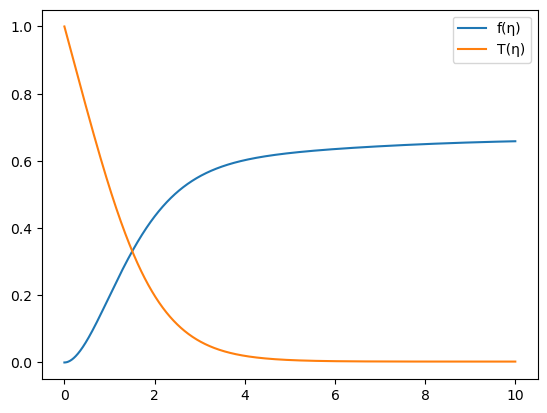

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def equations(t, y):
    f, f1, f2, T, T1 = y
    f3 = 2*(f1**2) - 3*f*f2 - T
    T2 = -2.1*f*T1
    return [f1, f2, f3, T1, T2]

y0 = [0, 0, 0.68, 1, -0.5]
t_span = [0, 10]

sol = solve_ivp(equations, t_span, y0, dense_output=True)

t_vals = np.linspace(0, 10, 1000)
y_vals = sol.sol(t_vals)

plt.plot(t_vals, y_vals[0], label='f(η)')
plt.plot(t_vals, y_vals[3], label='T(η)')
plt.legend()
plt.show()

8.4 捕食者-被捕食者方程组
$$
\left\{
    \begin{array}{ll}
       \frac{dx}{dt}=0.2x-0.005xy,x(0)=70,\\
       \frac{dy}{dt}=-0.5y+0.01xy,y(0)=40,\\
    \end{array}
\right.
$$
其中$x(t)$表示第t个月兔子的总体数量，y(t)表示狐狸的总体数量<p>
(1)x(t)和y(t)的变化周期;<p>
(2)x(t)的最大值和最小值，以及它们第一次出现的时间<p>
(2)y(t)的最大值和最小值，以及它们第一次出现的时间

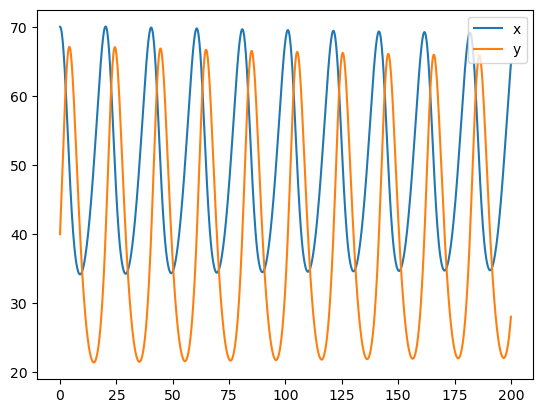

x(t)的变化周期为： [101 101 101 101 101 101 100 101]
y(t)的变化周期为： [101 101 101 101 100 101 101 101 101]
x(t)的最大值为： 70.05117906950734 ，出现时间为： 20.200000000000003
y(t)的最大值为： 67.0991014070261 ，出现时间为： 4.2


In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程组
from scipy.signal import find_peaks


def fun(t, y):
    x, y = y
    dxdt = 0.2*x - 0.005*x*y
    dydt = -0.5*y + 0.01*x*y
    return [dxdt, dydt]
def gettime(t0,t,segments,index):
    return t0+((t-t0)/segments)*index

# 定义初始条件
t0 = 0
y0 = [70, 40]

# 定义求解区间
t_span = [t0, 200]

# 求解微分方程组
sol = solve_ivp(fun, t_span, y0, dense_output=True)

# 计算周期
x, y = sol.sol(np.linspace(t0, 200, 1000))

t_vals = np.linspace(0, 200, 1000)
y_vals = sol.sol(t_vals)

plt.plot(t_vals, y_vals[0], label='x')
plt.plot(t_vals, y_vals[1], label='y')
plt.legend()
plt.show()

x_peaks, _ = find_peaks(x)
y_peaks, _ = find_peaks(y)
x_period = np.diff(x_peaks)
y_period = np.diff(y_peaks)

# 计算最大值和最小值
x_max = np.max(x)
x_min = np.min(x)
y_max = np.max(y)
y_min = np.min(y)

# 计算最大值和最小值的时间
x_max_time = np.argmax(x)
x_min_time = np.argmin(x)
y_max_time = np.argmax(y)
y_min_time = np.argmin(y)



# 打印结果
print("x(t)的变化周期为：", x_period)
print("y(t)的变化周期为：", y_period)
print("x(t)的最大值为：", x_max, "，出现时间为：", gettime(t0, 200, 1000,x_max_time ))

print("y(t)的最大值为：", y_max, "，出现时间为：", gettime(t0, 200, 1000,y_max_time ))


8.5 改善8.3.4节中的传染病模型，提高预测精度。

8.6某地区野兔的数量连续9年的统计量如表所示，预测t=9，10时野兔的数量。<p>



In [6]:
import numpy as np
from scipy.optimize import curve_fit

# 野兔数量数据
data = np.array([5, 5.9945, 7.0932, 8.2744, 9.5073, 10.7555, 11.9804, 13.1465, 14.2247])

# 定义 Logistic 模型
def logistic(t, r, K, N0):
    return K / (1 + (K / N0 - 1) * np.exp(-r * t))

# 拟合 Logistic 模型
t = np.arange(len(data))
params, cov = curve_fit(logistic, t, data)

# 输出拟合结果
print("增长率 r =", params[0])
print("环境容纳量 K =", params[1])
print("初始数量 N0 =", params[2])
N9 = logistic(9, *params)
N10 = logistic(10, *params)
# 输出预测结果
print("预测 t=9 时野兔数量为：", N9)
print("预测 t=10 时野兔数量为：", N10)

增长率 r = 0.24999749019125136
环境容纳量 K = 20.000220813682173
初始数量 N0 = 5.000006729828478
预测 t=9 时野兔数量为： 15.195324055961517
预测 t=10 时野兔数量为： 16.048136703681696


8.7 捕食者-被捕食者方程组
$$
\left\{
    \begin{array}{ll}
       \frac{dx}{dt}=ax-bxy,x(0)=60,\\
       \frac{dy}{dt}=-cy+dxy,y(0)=30,\\
    \end{array}
\right.
$$
其中x(t)表示第t个月时兔子的总体数量，y(t)表示狐狸的，参数a,b,c,d未知。利用表的13对观测值，拟合未知参数。

In [7]:

import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
def predator_prey(t, z, a, b, c, d):
    x, y = z
    dxdt = a * x - b * x * y
    dydt = -c * y + d * x * y
    return [dxdt, dydt]
z0 = [60, 30]  # 初始条件
t_span = [0, 18]  # 时间范围
t1=np.arange(0,7,1)
t2=np.arange(8,20,2)
t_eval = np.concatenate((t1,t2))  # 时间点
def fit_predator_prey(params):
    a, b, c, d = params
    sol = solve_ivp(predator_prey, t_span, z0, t_eval=t_eval, args=(a, b, c, d))
    return sol.y
def loss_func(params, data):
    y_pred = fit_predator_prey(params)
    loss = ((y_pred - data.T) ** 2).sum()
    return loss
data = np.array([[60, 30], [63,34], [64,38], [63, 44], [61, 50],[58, 55], [53, 58], [44, 56], [39, 47], [38, 38], [41, 30], [46, 27], [53, 26]])
params0 = [0.5, 0.01, 0.05, 0.001]  # 初始参数
res = minimize(loss_func, params0, args=(data,), method='Nelder-Mead')
params = res.x
print(f"拟合参数：a={params[0]:.4f}, b={params[1]:.4f}, c={params[2]:.4f}, d={params[3]:.4f}")
y_pred = fit_predator_prey(params)
print("预测结果：")
print(np.round(y_pred.T))

拟合参数：a=0.2015, b=0.0050, c=0.4960, d=0.0099
预测结果：
[[60. 30.]
 [63. 34.]
 [64. 38.]
 [63. 44.]
 [61. 50.]
 [58. 55.]
 [53. 58.]
 [44. 56.]
 [39. 47.]
 [38. 37.]
 [41. 30.]
 [46. 26.]
 [53. 26.]]
